# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Litesh Samji

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"Processing Record: {city}")
    except:
        print(f"City NOT found: {city}")
print("Complete")

City NOT found: taolanaro
Processing Record: languyan
Processing Record: kamaishi
Processing Record: guozhen
Processing Record: vila velha
Processing Record: saint-pierre
Processing Record: margate
Processing Record: oktyabrskoye
Processing Record: albany
Processing Record: naivasha
Processing Record: bredasdorp
Processing Record: saint george
Processing Record: fairbanks
Processing Record: busselton
Processing Record: evanston
Processing Record: revda
Processing Record: hermanus
Processing Record: cairns
Processing Record: llanes
Processing Record: jamestown
Processing Record: axim
Processing Record: punta arenas
Processing Record: taltal
Processing Record: pangkalanbuun
Processing Record: chunskiy
Processing Record: cherskiy
Processing Record: hilo
Processing Record: waingapu
Processing Record: bethel
Processing Record: fort nelson
Processing Record: pacific grove
Processing Record: ushuaia
Processing Record: port alfred
Processing Record: bluff
City NOT found: tabiauea
Processing Re

Processing Record: laguna
Processing Record: ponoka
Processing Record: portland
City NOT found: tsihombe
Processing Record: malavalli
Processing Record: avera
Processing Record: myaundzha
City NOT found: macaboboni
Processing Record: mansa
Processing Record: jalu
Processing Record: victor harbor
City NOT found: vaitupu
Processing Record: rawson
Processing Record: lebu
Processing Record: adiake
Processing Record: fortuna
Processing Record: challans
Processing Record: ouadda
Processing Record: aschersleben
Processing Record: nelson bay
Processing Record: chumikan
Processing Record: karangasem
Processing Record: cidreira
Processing Record: masuguru
City NOT found: we
Processing Record: soldotna
Processing Record: sawankhalok
Processing Record: dzhebariki-khaya
Processing Record: artesia
Processing Record: nipawin
Processing Record: novobureyskiy
Processing Record: mikhaylovsk
Processing Record: la ronge
Processing Record: lubben
Processing Record: dicabisagan
Processing Record: kawalu
Pro

Processing Record: athabasca
Processing Record: gosforth
Processing Record: kashan
Processing Record: santa rosa
Processing Record: lasa
Processing Record: sao filipe
Processing Record: saiha
Processing Record: olovo
Processing Record: sao gabriel da cachoeira
Processing Record: kasongo-lunda
Processing Record: trapani
Processing Record: vao
Processing Record: laguna de perlas
Processing Record: saint michael
Processing Record: yeniseysk
Processing Record: magistralnyy
Processing Record: dunedin
Processing Record: karangampel
Processing Record: nushki
Processing Record: praia da vitoria
Processing Record: ranfurly
City NOT found: grand centre
Processing Record: guatire
Processing Record: dalianwan
City NOT found: bababe
Processing Record: grand gaube
Processing Record: hambantota
Processing Record: stefan voda
Processing Record: hami
Processing Record: coihaique
Processing Record: waddan
Processing Record: sabang
Processing Record: bambanglipuro
Processing Record: punta alta
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather_df = pd.DataFrame({"City": foundCities,
                        "Lat": lat,
                        "Lng": lon,
                        "Max Temp": temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,                                                    
                        "Wind Speed": windSpeed,
                        "Country": country, 
                        "Date": date
                          })

#Save to file
city_weather_df.to_csv("../output/cities.csv", index=True, index_label="City", header=True)

#Print dataframe
city_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,languyan,5.2618,120.0807,86.18,64,98,2.19,PH,1630654068
1,kamaishi,39.2667,141.8833,76.15,70,100,6.40,JP,1630654069
2,guozhen,34.3659,107.3590,73.33,94,100,6.04,CN,1630654070
3,vila velha,-20.3297,-40.2925,66.15,94,75,2.30,BR,1630654070
4,saint-pierre,-21.3393,55.4781,76.68,59,3,29.93,RE,1630654071
...,...,...,...,...,...,...,...,...,...
573,sao miguel do araguaia,-13.2750,-50.1628,79.79,35,88,4.09,BR,1630654486
574,shihezi,44.3000,86.0333,85.93,18,8,12.86,CN,1630654487
575,smirnykh,49.7500,142.8333,59.59,92,87,6.35,RU,1630654488
576,sioux lookout,50.1001,-91.9170,61.18,82,90,9.22,CA,1630654488


In [7]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,21.241187,18.576051,68.173633,69.726644,55.560554,8.325813,1.630654e+09
std,33.429300,89.529539,14.833787,22.360866,40.270971,6.074597,1.343244e+02
min,-54.800000,-175.200000,30.880000,5.000000,0.000000,0.000000,1.630654e+09
25%,-7.138600,-59.300075,57.150000,58.000000,10.250000,3.440000,1.630654e+09
50%,27.731850,23.905050,69.330000,75.000000,67.000000,6.835000,1.630654e+09
75%,50.164675,100.145475,80.102500,87.000000,98.000000,12.072500,1.630654e+09
max,78.218600,179.316700,103.190000,100.000000,100.000000,31.070000,1.630654e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_over_100 = city_weather_df[(city_weather_df['Humidity'] > 100)]
humidity_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

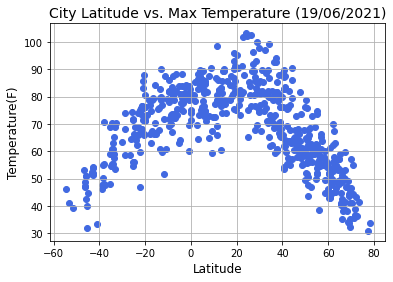

In [11]:
plt.scatter(lat, temp, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature (19/06/2021)", fontsize=14)
plt.ylabel("Temperature(F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save and show scatter plot
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()


### Analysis
Scatterplot (above) for Temperature (F) vs. Latitude shows temperatures North and South of the Equator have lower max temperatures as compared to temperature closer to the Equator. 

## Latitude vs. Humidity Plot

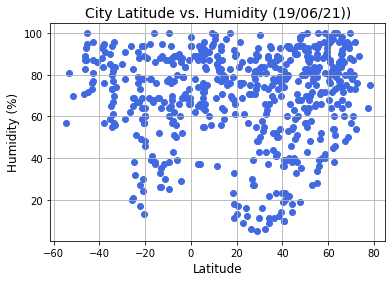

In [10]:
plt.scatter(lat, humidity, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity (19/06/21))", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

### Analysis 
There seems to be no correlation between City Latitude and Humidity levels for randomly selected cities.

## Latitude vs. Cloudiness Plot

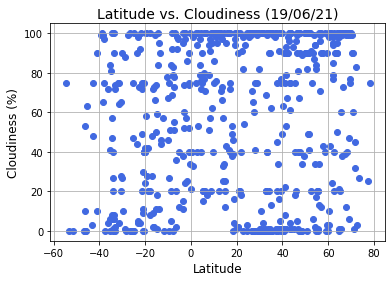

In [9]:
plt.scatter(lat, cloudiness, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness (19/06/21)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()


### Analysis
There seems to be no correlation between Latitude and Cloudiness 

## Latitude vs. Wind Speed Plot

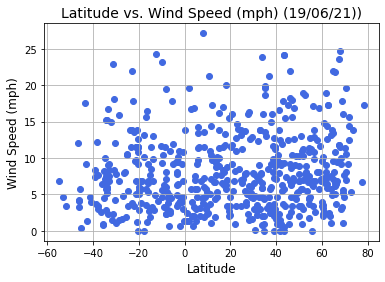

In [10]:
plt.scatter(lat, windSpeed, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Wind Speed (mph) (19/06/21))", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

### Analysis
No correlation between Latitude and cloudiness. However wind speed during this time of the year is low.

## Linear Regression

In [11]:
# Create a function to create Linear Regression plots

def linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(eq_plotX,eq_plotY),fontsize=15,color="red")
    
    # X always Latitude
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
# Create and split dataframe
northern_df = city_weather_df.loc[city_weather_df["Lat"] > 0]
southern_df = city_weather_df.loc[city_weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6726510651990277
y = -0.49x + 89.0


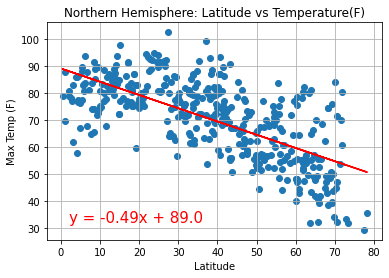

In [12]:
#Create data sets to compare 
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

#Display's the equation at x,y points
eq_plotX = 2
eq_plotY = 32

#label y axis
y_label = "Max Temp (F)"

#Title
plt.title(f'Northern Hemisphere: Latitude vs Temperature(F)')

#Display the Regression Value
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)

#Out an image file
plt.savefig(f'../output/Northern Hemisphere Latitude vs Temp.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7360757424586789
y = 0.76x + 80.53


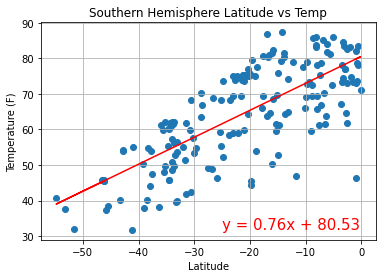

In [13]:
#Get Latitude and Max temp values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

#Display's the equation at x,y points
eq_plotX = -25
eq_plotY = 32

#Display
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Southern Hemisphere Latitude vs Temp.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.07099567213454511
y = -0.09x + 68.49


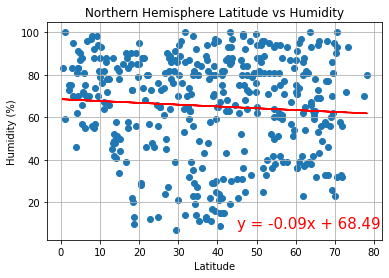

In [14]:
#Get Latitude and Humidity values
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

#Display's the equation at x,y points
eq_plotX = 45
eq_plotY = 8

#Display
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Northern Hemisphere Latitude vs Humidity.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.038930606367334496
y = 0.05x + 74.99


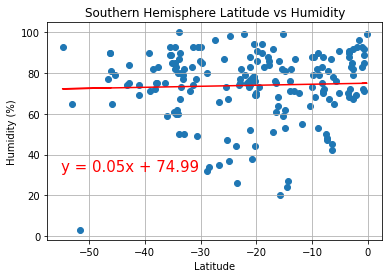

In [15]:
#Get Latitude and Humidity values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 32

#Display
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.003227685629202611
y = 0.01x + 59.46


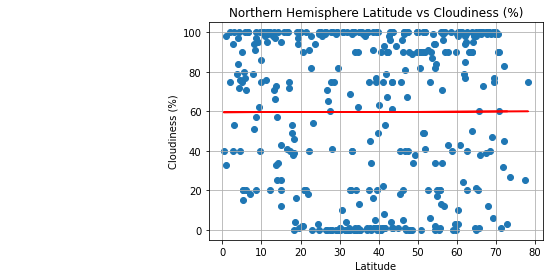

In [16]:
#Get Latitude and Cloudiness values
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 12

#Display
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Nothern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.19287818910213111
y = 0.52x + 59.04


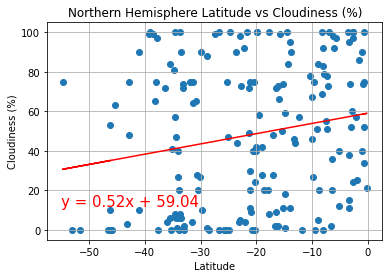

In [17]:
#Get Latitude and Cloudiness values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 12

#Display
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Nothern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.09903109991025379
y = 0.03x + 7.23


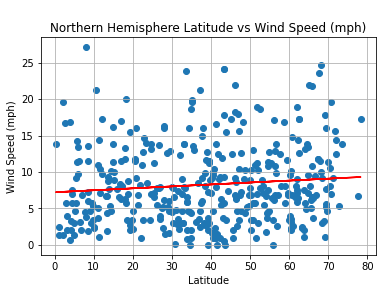

In [19]:
#Get Latitude and Windspeed values
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

#Display's the equation at x,y points
eq_plotX = 2
eq_plotY = 31

#Display
y_label = "Wind Speed (mph)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed (mph)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.00041065495756588383
y = -0.0x + 7.4


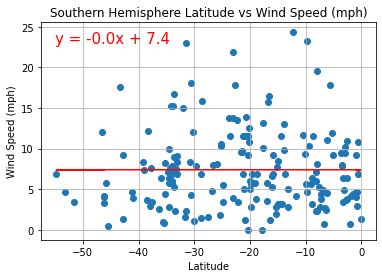

In [21]:
#Get Latitude and Windspeed values
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 23

#Display
y_label = "Wind Speed (mph)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed (mph)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()